In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/NUS_GAIP_GRP9/HPE Project/Datasets/Merged_food.csv')
df = data

In [ ]:
df.head()

,Unnamed: 0,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [ ]:
df.shape

(456548, 16)

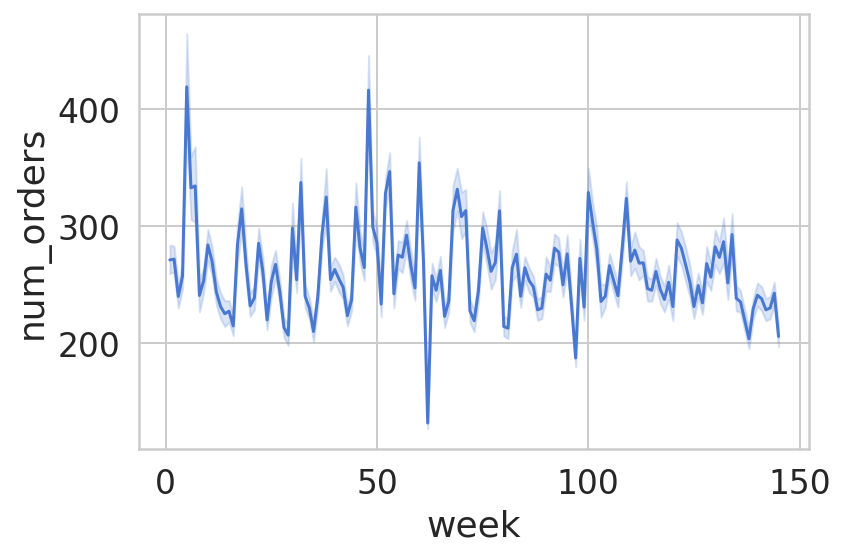

In [ ]:
sns.lineplot(x=df.week, y="num_orders", data=df);

In [ ]:
df['month']=((df['week']-1)/4).astype('int64')
df['month'] = df['month'].map({0:'Jan',1:'Feb',2:'Mar',3:'Apr',4:'May',5:'June',6:'July',7:'Aug',8:'Sep',9:'Oct',
                            10:'Nov',11:'Dec',12:'Jan',13:'Feb',14:'Mar',15:'Apr',16:'May',17:'June',18:'July',
                            19:'Aug',20:'Sep',21:'Oct',22:'Nov',23:'Dec',24:'Jan',25:'Feb',26:'Mar',27:'Apr',28:'May',
                            29:'June',30:'July',31:'Aug',32:'Sep',33:'Oct',34:'Nov',35:'Dec',36:'Jan'})

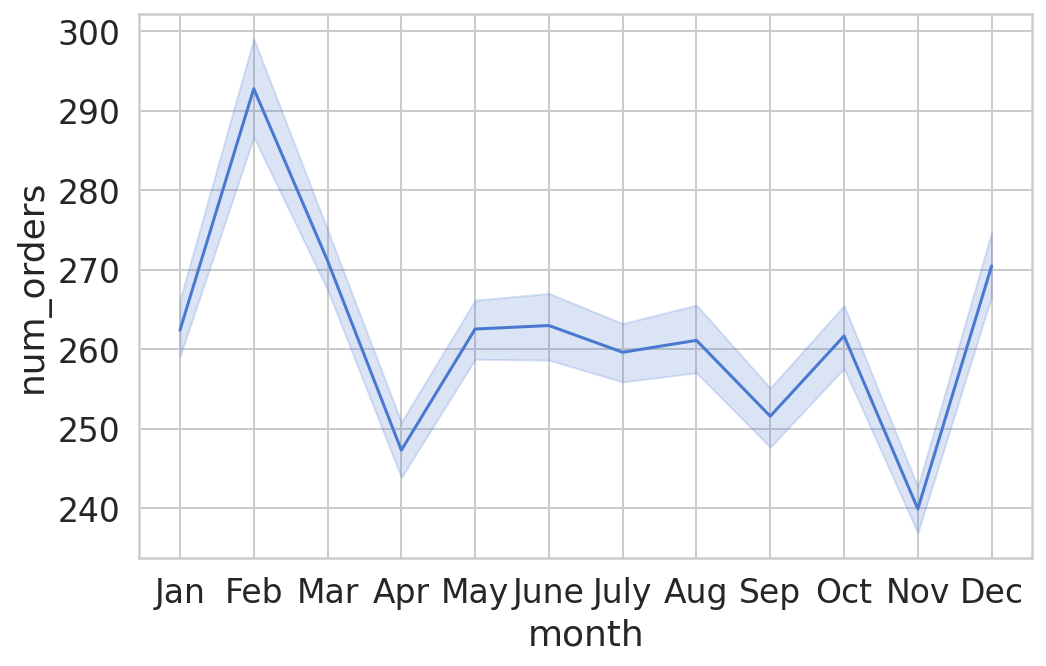

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df.month, y="num_orders", data=df);

In [ ]:
df['quarter']=(df['week']/13).astype('int64')
df['quarter'] = df['quarter'].map({0:'Q1', 1:'Q2', 2:'Q3', 3:'Q4', 4:'Q1', 5:'Q2', 6:'Q3', 7:'Q4', 8:'Q1', 9:'Q2', 10:'Q3',11:'Q4'})

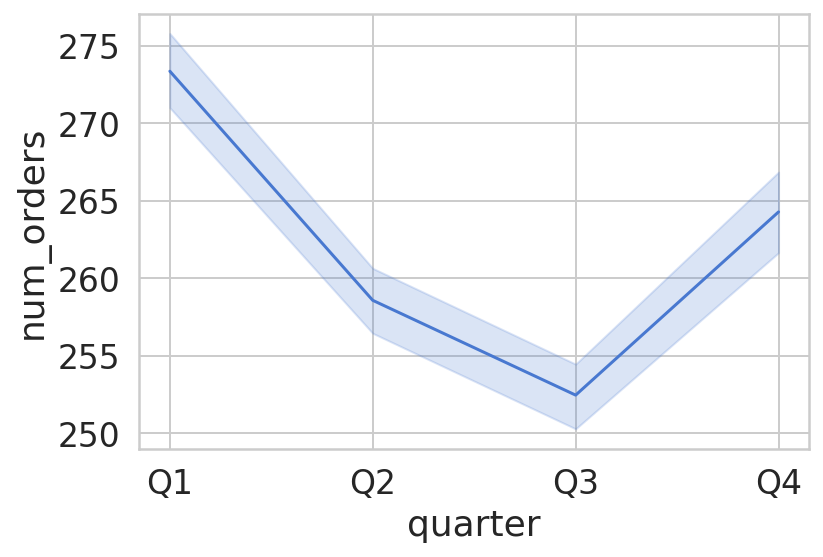

In [ ]:
sns.lineplot(x=df.quarter, y="num_orders", data=df);

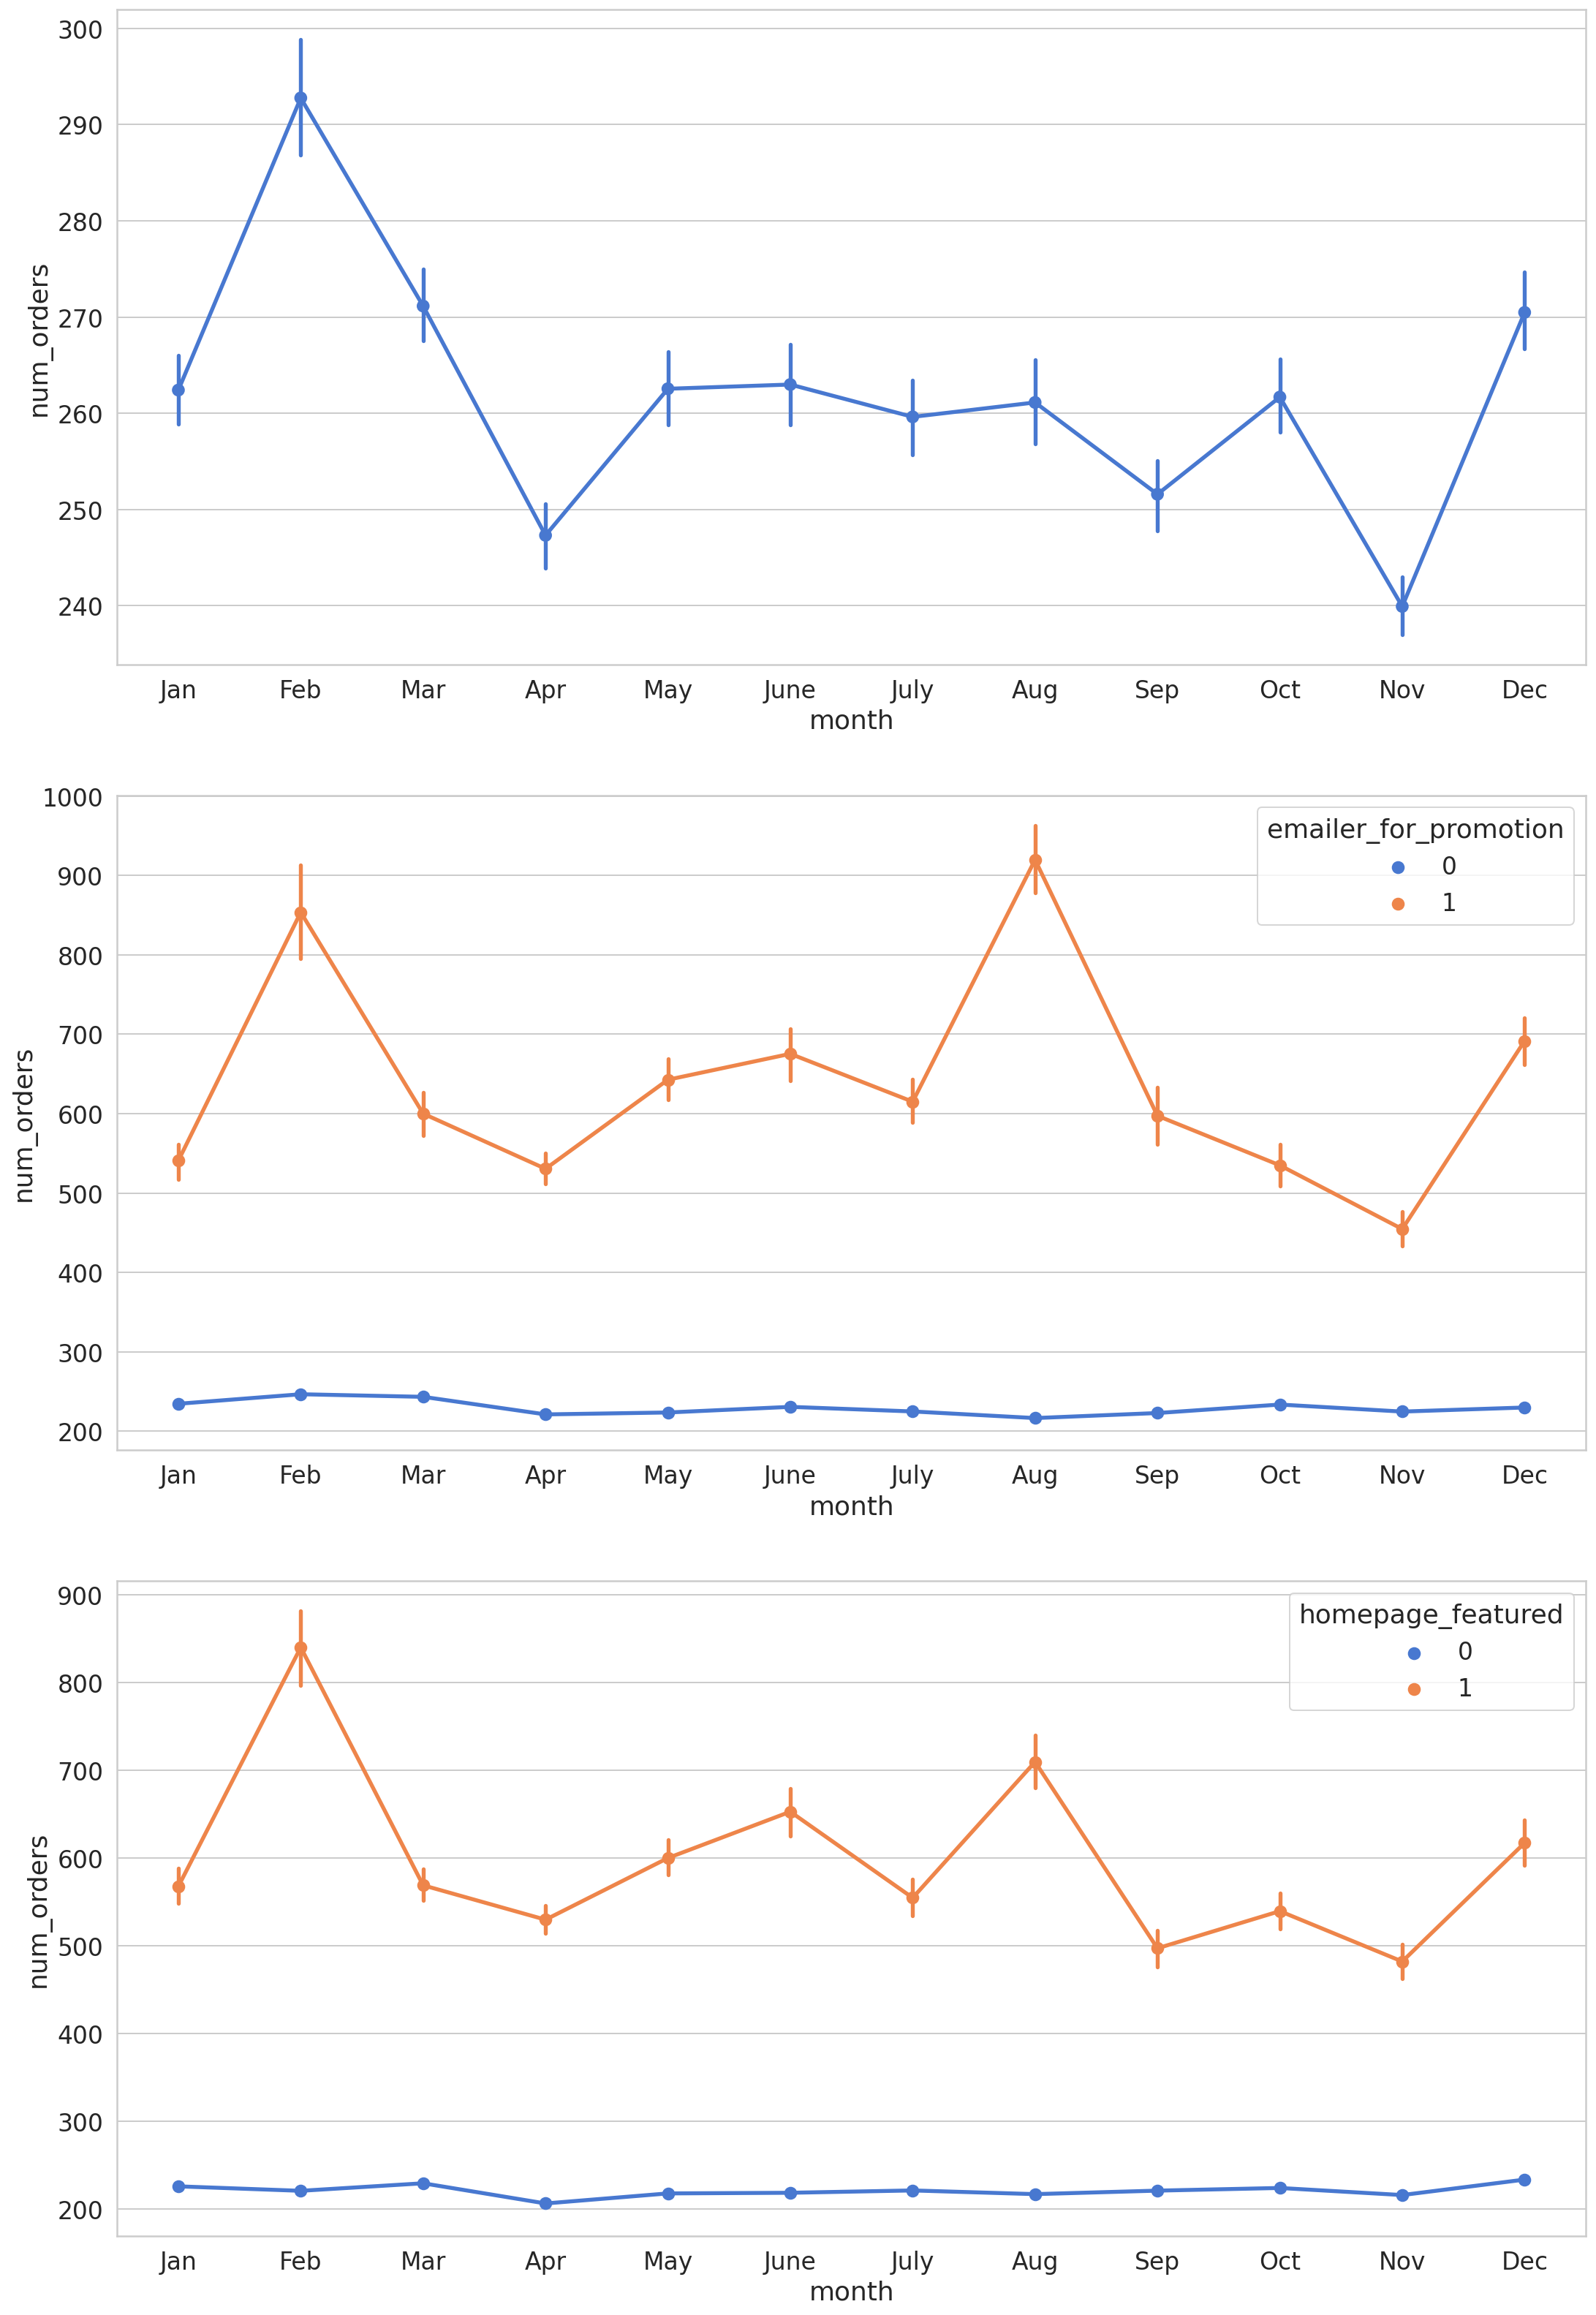

In [ ]:
fig,(ax1, ax2, ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18, 28)

sns.pointplot(data=df, x='month', y='num_orders', ax=ax1)
sns.pointplot(data=df, x='month', y='num_orders', hue='emailer_for_promotion', ax=ax2)
sns.pointplot(data=df, x='month', y='num_orders', hue='homepage_featured', ax=ax3)

Text(0.5, 0, 'Category')

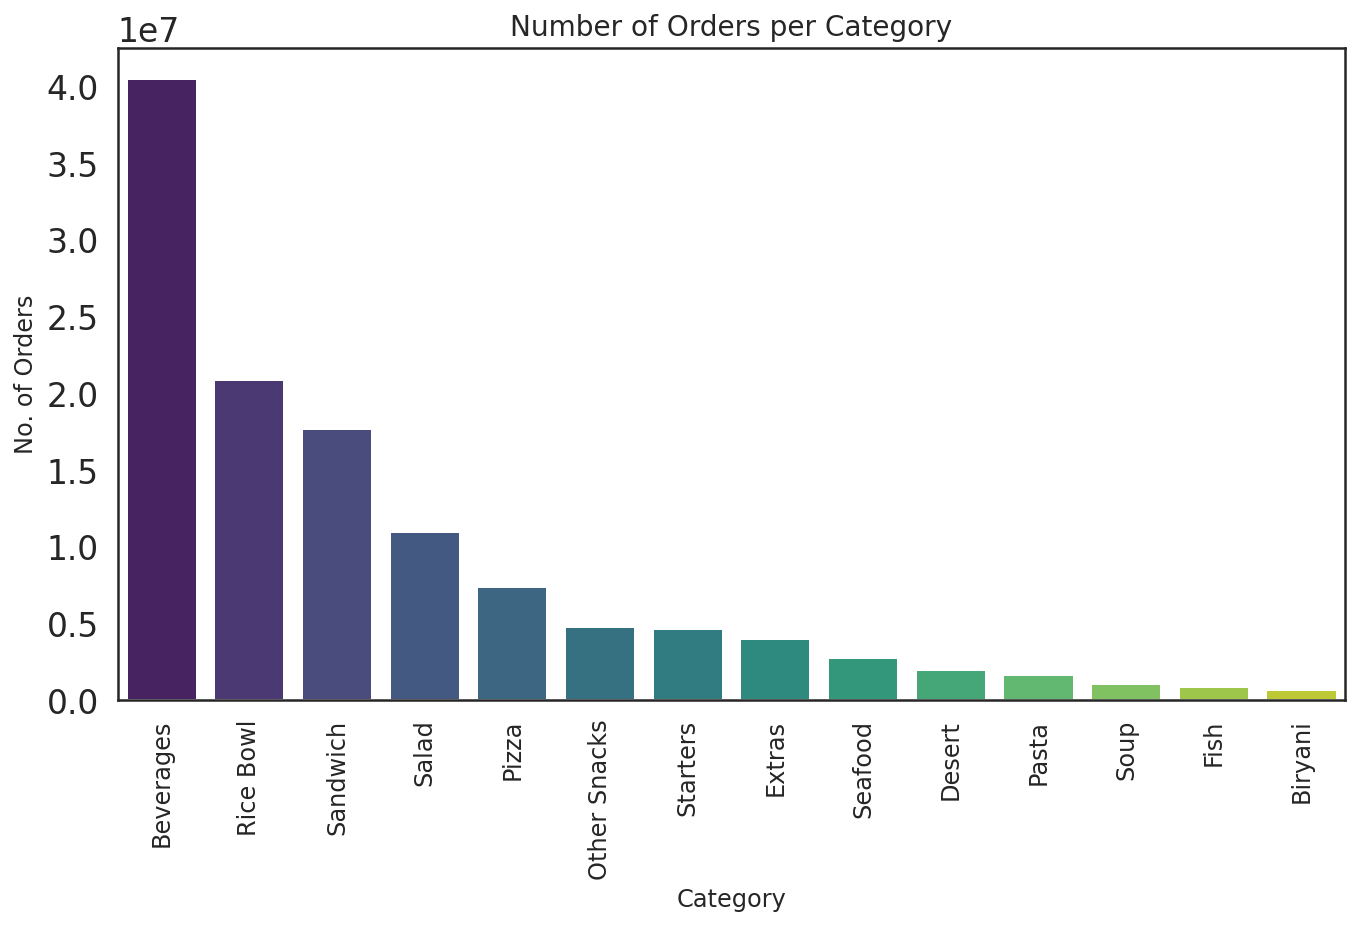

In [ ]:
#Determining the category most preferred by the customers
fig=plt.figure(figsize=(11,6))
sns.set_style("white")

plt.xticks(rotation=90,fontsize=12)
plt.title('Number of Orders per Category',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='category', data=df.groupby('category').num_orders.sum().sort_values(ascending=False).reset_index(),palette='viridis');
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Category',fontdict={'fontsize':12})

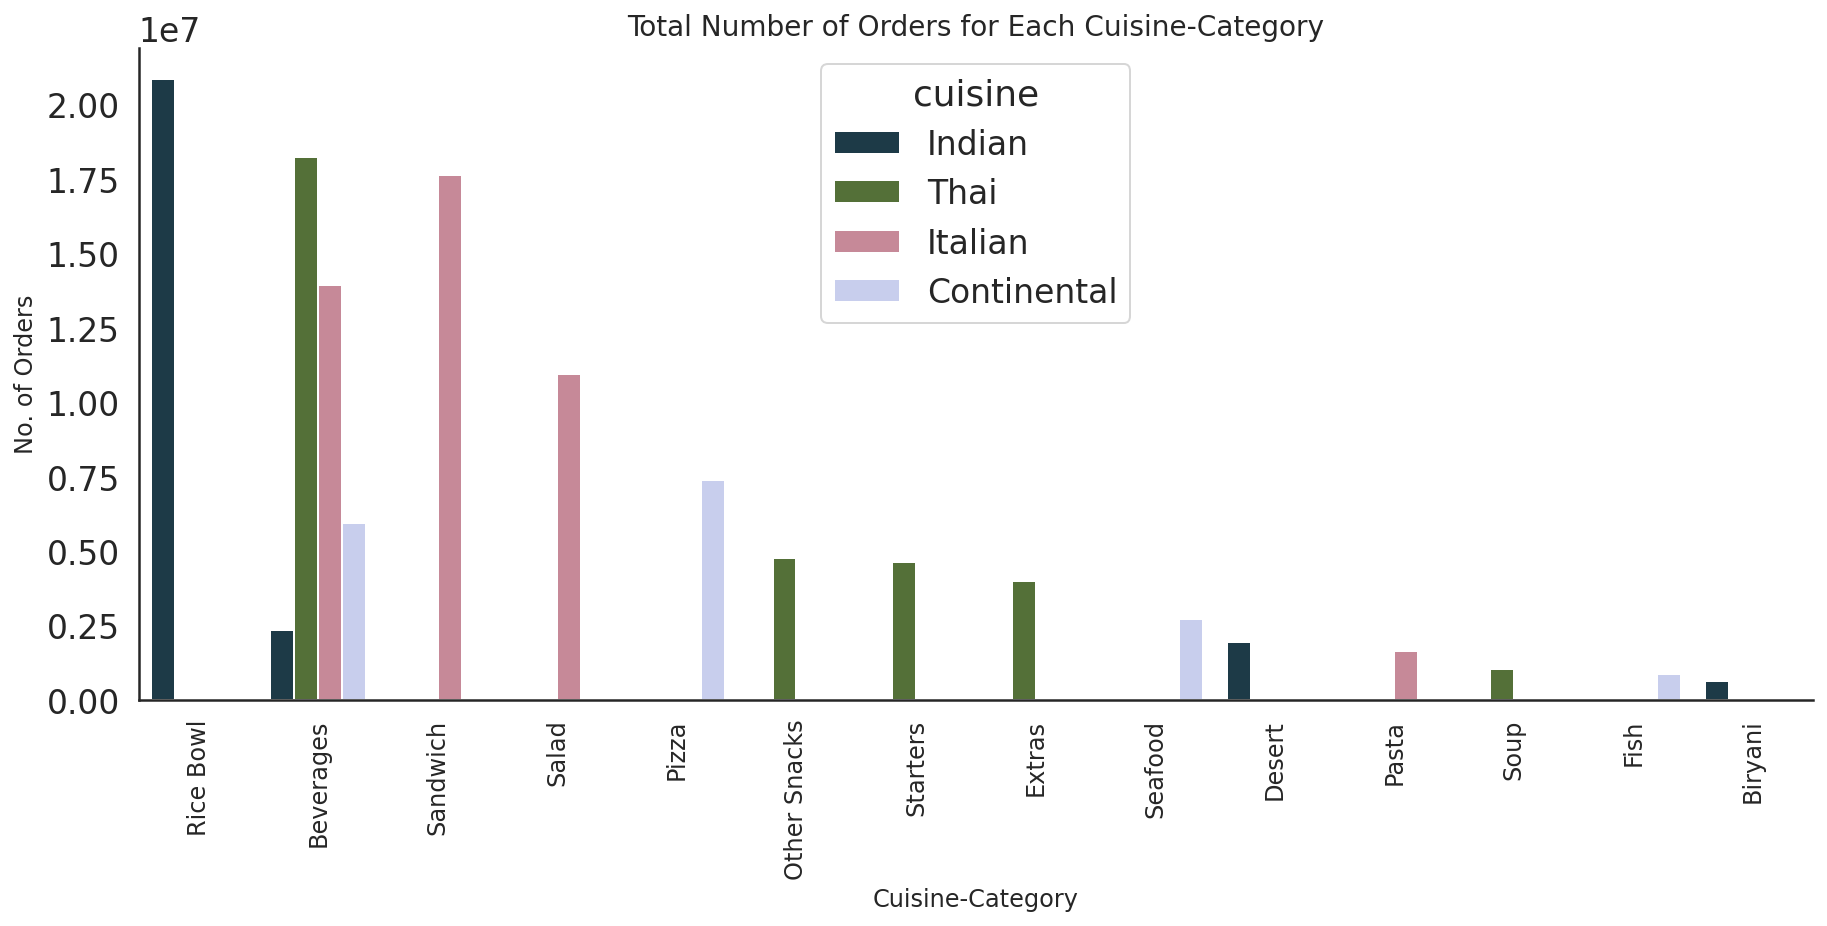

In [ ]:
#Determining the category per cuisine most preferred by customers
fig=plt.figure(figsize=(15,6))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of Orders for Each Cuisine-Category',fontdict={'fontsize':14})

sns.barplot(x='category',y='num_orders',data=df.groupby(['cuisine','category']).sum().sort_values(by='num_orders', ascending=False).reset_index(),hue='cuisine',palette='cubehelix')

plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Cuisine-Category',fontdict={'fontsize':12})
sns.despine(bottom = False, left = False);

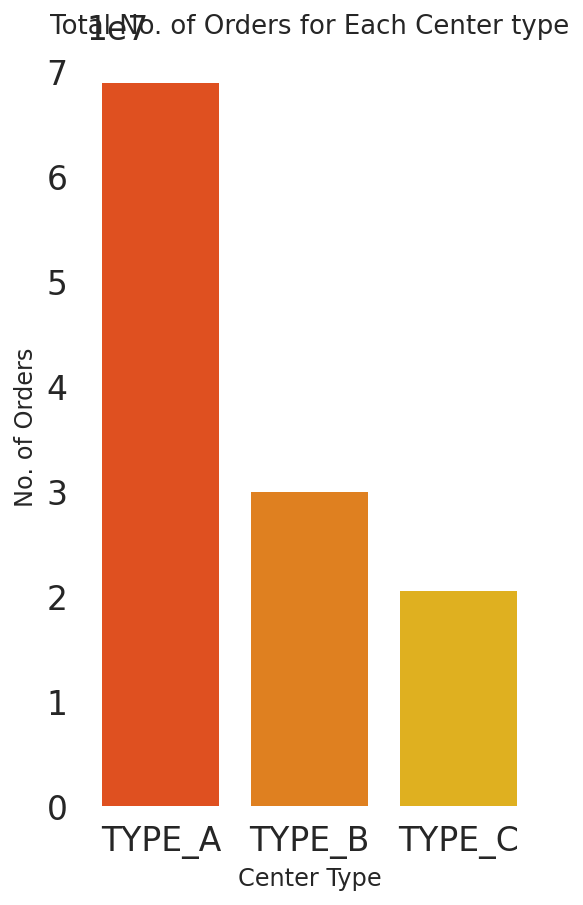

In [ ]:
#Plotting the total nmber of orders received by each center type across all regions
fig=plt.figure(figsize=(4,7))
plt.title('Total No. of Orders for Each Center type',fontdict={'fontsize':13})
sns.barplot(y='num_orders', x='center_type', data=df.groupby('center_type').sum()['num_orders'].reset_index(),palette='autumn');
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Center Type',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

In [ ]:
ax = sns.heatmap(train.corr(), annot=True)

In [ ]:
def outliers(col):
    q3=round(df[col].quantile(0.75),6)
    q1=round(df[col].quantile(0.25),6)
    iqr=q3-q1
    lw = q1 - (3*iqr)
    hw = q3 + (3*iqr)  
    uo=df[df[col]>hw].shape[0]
    lo=df[df[col]<lw].shape[0]
    print('Number of Upper Outliers :',uo)
    print('Number of Lower Outliers :',lo)
    print('Percentage of Outliers :',((uo+lo)/df.shape[0])*100)
    return hw
    
hw = outliers('num_orders')

Number of Upper Outliers : 13245
Number of Lower Outliers : 0
Percentage of Outliers : 2.901118830878681


In [ ]:
train.describe()

,Unnamed: 0,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,365238.000000,3.652380e+05,365238.000000,365238.000000,365238.000000,365238.000000,365238.000000,365238.000000,365238.000000,365238.000000,365238.000000,365238.000000,365238.000000
mean,226724.299473,1.249948e+06,60.562455,82.134923,2022.893604,330.466444,352.066613,0.082108,0.110068,265.283985,601.559920,56.594812,4.082664
std,131101.362207,1.443790e+05,33.618528,45.981341,547.261050,152.866256,159.863266,0.274530,0.312975,402.990055,66.233687,17.639746,1.090405
min,0.000000,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.000000,13.000000,456.000000,23.000000,0.900000
25%,113396.250000,1.124769e+06,32.000000,43.000000,1558.000000,228.980000,242.560000,0.000000,0.000000,54.000000,553.000000,34.000000,3.600000
50%,226293.500000,1.249898e+06,61.000000,76.000000,1971.000000,292.030000,309.430000,0.000000,0.000000,136.000000,596.000000,56.000000,4.000000
75%,339714.750000,1.374944e+06,90.000000,110.000000,2539.000000,445.230000,456.870000,0.000000,0.000000,325.000000,651.000000,77.000000,4.500000
max,456519.000000,1.499999e+06,118.000000,186.000000,2956.000000,738.230000,738.230000,1.000000,1.000000,24299.000000,713.000000,93.000000,7.000000


In [ ]:
#checking skewness of checkout price column in the train set
plt.figure(figsize=(10,5))
sns.distplot(train['checkout_price'])
plt.show()

In [ ]:
#checking skewness of checkout price column in the train set
plt.figure(figsize=(10,5))
sns.distplot(train['base_price'])
plt.show()

In [ ]:
#https://towardsdatascience.com/demand-prediction-with-lstms-using-tensorflow-2-and-keras-in-python-1d1076fc89a0
#https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651
#https://colab.research.google.com/drive/1k3PLdczAJOIrIprfhjZ-IRXzNhFJ_OTN#scrollTo=FLGKCn9h_Fzg